In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Loading Data**

In [2]:
train_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [3]:
test_ds = keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/dogs-vs-cats/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


# **Data Inspection**

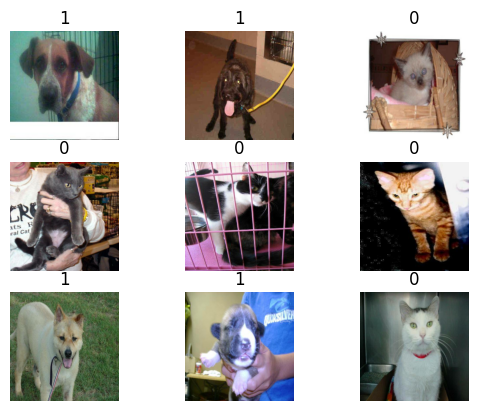

In [4]:
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy()/255.0)
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

# **Data Preprocessing & Augmentation**

In [5]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

# **Training the Model**

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="valid", activation="relu", input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 49s 70ms/step - loss: 1.9516 - accuracy: 0.5598 - val_loss: 0.7036 - val_accuracy: 0.5992
Epoch 2/10
625/625 [==============================] - 37s 58ms/step - loss: 0.6710 - accuracy: 0.6114 - val_loss: 0.6214 - val_accuracy: 0.6494
Epoch 3/10
625/625 [==============================] - 36s 57ms/step - loss: 0.6331 - accuracy: 0.6430 - val_loss: 0.6276 - val_accuracy: 0.6398
Epoch 4/10
625/625 [==============================] - 36s 58ms/step - loss: 0.6192 - accuracy: 0.6586 - val_loss: 0.5833 - val_accuracy: 0.6874
Epoch 5/10
625/625 [==============================] - 36s 57ms/step - loss: 0.6028 - accuracy: 0.6776 - val_loss: 0.5681 - val_accuracy: 0.7082
Epoch 6/10
625/625 [==============================] - 36s 58ms/step - loss: 0.5678 - accuracy: 0.7089 - val_loss: 0.5394 - val_accuracy: 0.7316
Epoch 7/10
625/625 [==============================] - 36s 57ms/step - loss: 0.5709 - accuracy: 0.7132 - val_loss: 0.5890 - val_accuracy:

# **Visualization**

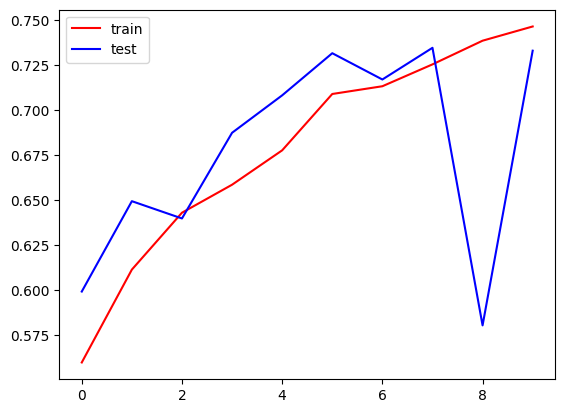

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

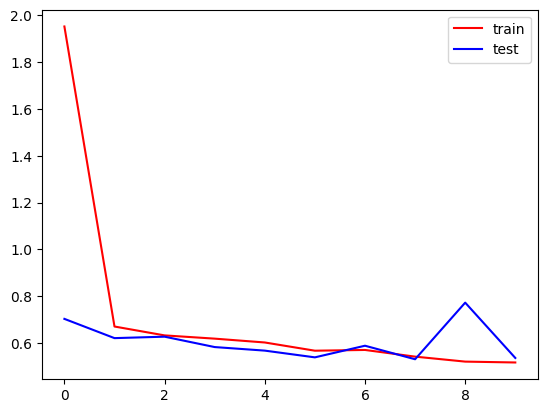

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

****

# **Testing the Model**

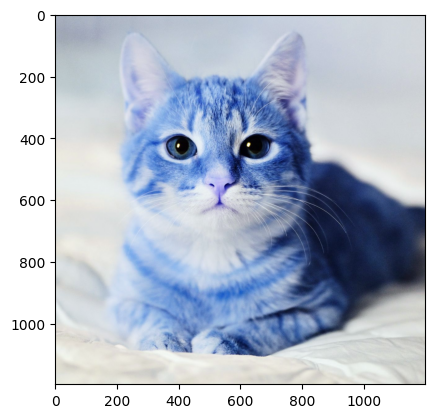

In [12]:
#need to reduce complexity > add more data > reducing complexity

import cv2
import matplotlib.pyplot as plt

# Load the cat image
image_path = '/kaggle/input/anotha-cat/orangecat.jpg'  
test_image1 = cv2.imread(image_path)


plt.imshow(test_image1)
plt.show()

In [13]:
test_image1.shape

(1197, 1200, 3)

In [14]:
test_image1 = cv2.resize(test_image1,(256,256))

In [15]:
test_input1 = test_image1.reshape(1,256,256,3)

In [16]:
model.predict(test_input1)

1/1 [==============================] - 0s 240ms/step


array([[1.]], dtype=float32)

****

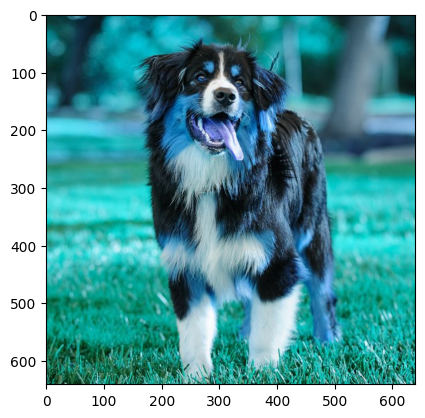

In [17]:
# Load the dog image
image_path = '/kaggle/input/anotha-dog/dog.jpg'  
test_image2 = cv2.imread(image_path)


plt.imshow(test_image2)
plt.show()

In [18]:
test_image2.shape

(641, 640, 3)

In [19]:
test_image2 = cv2.resize(test_image2,(256,256))

In [20]:
test_input2 = test_image2.reshape(1,256,256,3)

In [21]:
model.predict(test_input2)

1/1 [==============================] - 0s 19ms/step


array([[0.42437565]], dtype=float32)